# House Prices

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
house_train = pd.read_csv('train_housing.csv')
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_train.shape


(1460, 81)

## Preprocessing
### Remplacement des valeurs manquantes et suppressions dont les val manquantes sont élevées.

In [4]:
house_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Traitement des valeures manquantes

In [29]:
house_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
house_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
house_train.shape

(1460, 81)

### Valeurs manquantes par la valeur la plus fréquente.

In [7]:
# je remplace par zéro ces colonnes
house_train[['LotFrontage','MasVnrArea', 'GarageYrBlt' ]] = house_train[['LotFrontage','MasVnrArea', 'GarageYrBlt' ]].apply(lambda x:x.fillna(0))

In [8]:
# je remplace par la valeur la plus fréquente
house_train = house_train.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [9]:
house_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

### Supression des colonnes qui ont trop de valeurs manquantes

In [10]:
# pour ces 5 colonnes ( plus de 90%) il y a trop de valuers manquantes je vais les supprimé
house_train =  house_train.drop(['PoolQC','Fence', 'MiscFeature', 'FireplaceQu', 'Alley' ], axis=1)
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Encodage des variables catégoriques

In [11]:
house_train[['MasVnrType', 'BsmtQual','BsmtCond', 'BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','BsmtExposure','Heating','HeatingQC','CentralAir','KitchenQual','Functional','GarageCond','PavedDrive','SaleType','SaleCondition','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation']] = house_train[['Foundation','ExterCond','ExterQual','Exterior2nd','Exterior1st','RoofMatl','RoofStyle','HouseStyle','BldgType','Condition2','Condition1','Neighborhood','LandSlope','SaleCondition','SaleType','PavedDrive','GarageCond','Functional','KitchenQual','CentralAir','HeatingQC','Heating','BsmtExposure','LotConfig','Utilities','LandContour','LotShape','Street','MSZoning','GarageQual','GarageFinish','GarageType','Electrical','BsmtFinType2','MasVnrType', 'BsmtQual','BsmtCond', 'BsmtFinType1']].apply(lambda x:x.astype('category').cat.codes)

In [12]:
house_train[['MasVnrType', 'BsmtQual','BsmtCond', 'BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','BsmtExposure','Heating','HeatingQC','CentralAir','KitchenQual','Functional','GarageCond','PavedDrive','SaleType','SaleCondition','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation']]

,MasVnrType,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,MSZoning,...,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation
0,2,4,2,13,12,1,1,5,0,2,...,3,4,1,1,4,5,1,2,3,2
1,1,4,3,8,8,1,1,2,0,2,...,3,4,1,1,4,5,2,2,3,0
2,2,4,2,13,12,1,1,5,0,2,...,3,4,1,1,4,5,1,2,3,2
3,0,4,3,15,13,1,1,5,0,2,...,3,4,2,5,4,5,2,3,1,0
4,2,4,2,13,12,1,1,5,0,2,...,3,4,1,1,4,5,1,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,4,3,13,12,1,1,5,0,2,...,3,4,1,1,4,5,2,2,3,5
1456,1,4,3,10,9,1,1,2,0,2,...,3,4,2,1,4,4,3,2,3,0
1457,4,2,0,5,5,1,1,5,0,2,...,3,4,1,1,4,5,2,3,1,2
1458,1,4,3,8,8,1,3,2,0,2,...,3,4,2,1,0,4,2,3,3,2


#### Regroupement des variables

In [13]:
house_train['Condition'] = house_train['Condition1'] + house_train['Condition2'] + 1

In [14]:
house_train['StyleHouse'] = house_train['BldgType'] + house_train['HouseStyle'] + 1

In [15]:
house_train['HouseQual'] = house_train['OverallQual'] + house_train['OverallCond'] + 1

In [16]:
house_train['Roof'] = house_train['RoofStyle'] + house_train['RoofMatl'] + 1

In [17]:
house_train['Exterior'] = house_train['Exterior1st'] + house_train['Exterior1st'] + 1

In [18]:
house_train['BsmtFinType'] = house_train['BsmtFinType1'] + house_train['BsmtFinType2'] + 1

In [19]:
house_train['HeatingQual'] = house_train['Heating'] + house_train['HeatingQC'] + 1

In [20]:
house_train['FlrSF'] = house_train['1stFlrSF'] + house_train['2ndFlrSF'] + 1

In [21]:
house_train['FullBathTotal'] = house_train['BsmtFullBath'] + house_train['FullBath'] + 1

In [22]:
house_train['HalfBathTotal'] = house_train['BsmtHalfBath'] + house_train['HalfBath'] + 1

In [23]:
house_train['Bedroom'] = house_train['BedroomAbvGr'] + house_train['TotRmsAbvGrd'] + 1

In [24]:
house_train['GarageQ'] = house_train['GarageQual'] + house_train['GarageCond'] + 1

### Suppression des colonnes que j'ai fusionner en une nouvelle.

In [25]:
house_train = house_train.drop(['Condition1', 'Condition2', 'BldgType','HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','BsmtFinSF2','BsmtFinSF1', 'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','1stFlrSF', '2ndFlrSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd', 'KitchenAbvGr', 'KitchenQual', 'GarageQual','GarageCond'], axis = 1)

In [26]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,HouseQual,Roof,Exterior,BsmtFinType,HeatingQual,FlrSF,FullBathTotal,HalfBathTotal,Bedroom,GarageQ
0,1,60,2,65.0,8450,2,5,0,4,8,...,13,6,11,26,11,1711,4,2,12,2
1,2,20,2,80.0,9600,1,24,0,4,8,...,15,6,11,17,11,1263,3,2,10,2
2,3,60,2,68.0,11250,2,5,0,4,8,...,13,6,11,26,11,1787,4,2,10,2
3,4,70,2,60.0,9550,2,6,0,0,8,...,13,10,11,29,11,1718,3,1,11,2
4,5,60,2,84.0,14260,2,15,0,4,8,...,14,6,11,26,11,2199,4,2,14,2


### Modéle de prédiction

####  Régression linéaire

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y = house_train['SalePrice']
X = house_train.drop(['SalePrice'], axis=1)

In [28]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

print ("LR train score:", train_score)
print ("LR test score:", test_score)

LR train score: 0.8793448710837248
LR test score: 0.5993163606205085


#### Régression Ridge

In [31]:
from sklearn.linear_model import Ridge
# plus la valeur alpha est grande , plus il y a  de restriction sur les coefficients
# alpha faible> plus de généralisatione
# on teste d'abors sur un alpha faible
rr = Ridge(alpha=0.01) 
# restreint et dans ce cas, la régression linéaire et de ridge se ressemblent
# on teste sur un grand alpha pour faire une comparaison
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
# on commence par le petit alpha
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
print ("Ridge regression train score petit alpha:", Ridge_train_score)
print ("Ridge regression test score petit alpha:", Ridge_test_score)

Ridge regression train score petit alpha: 0.8793447731868839
Ridge regression test score petit alpha: 0.5996613416659675


In [33]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("Ridge regression train score grand alpha:", Ridge_train_score100)
print ("Ridge regression test score grand alpha:", Ridge_test_score100)

Ridge regression train score grand alpha: 0.8770381397745746
Ridge regression test score grand alpha: 0.6687729032032289


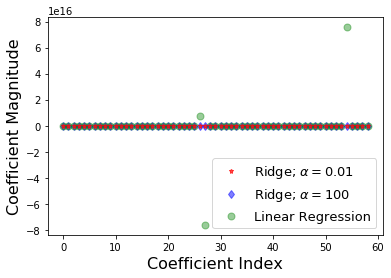

In [34]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

#### Régression Lasso

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73783295586.61615, tolerance: 719132949.9230078
  positive)


In [36]:
print ("nb de features utilisés: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

nb de features utilisés:  59


In [37]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score pour alpha=0.0001:", train_score00001)
print ("test score pour alpha =0.0001: ", test_score00001)
print ("nb de features utilisés pour alpha =0.0001:", coeff_used00001)

training score pour alpha=0.0001: 0.8793447732386118
test score pour alpha =0.0001:  0.599649037131248
nb de features utilisés pour alpha =0.0001: 59


C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73611153321.76227, tolerance: 719132949.9230078
  positive)


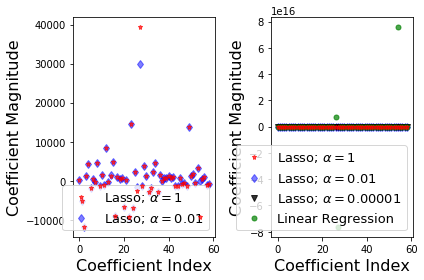

In [38]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

#### Cross Value

In [39]:
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print(scores)

[0.87618359 0.74651543 0.86202476 0.86363313 0.86181153]


#### GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV
for Model in [Ridge, Lasso]:
    #alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    alphas = range(1,1000)
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=3, ).fit(X_train, y_train)
    print('%s: %s' % (Model.__name__, gscv.best_params_))


Ridge: {'alpha': 92}


C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19068159306.930664, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41315859240.77228, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49887037308.237976, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 571147800.2850342, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513234861.053833, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 578275127.2249756, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613468847.9797363, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 682798039.2503662, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619970600.3519897, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783222022.8914795, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 714787082.6112671, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789744392.6706543, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792855551.9737549, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 873041542.8546143, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512943266.18188477, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 855974108.736023, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 941002079.2288818, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 560485804.7762451, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 601617526.8013306, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 916402497.4187012, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1006663794.2883301, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 974067373.6273193, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1069932177.4742432, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 648282761.2202759, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1125490947.4060059, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684986740.9327393, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1029214693.1264038, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1184419477.572876, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1081797358.267212, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189689054.7624512, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1149685210.605713, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1153943929.4035034, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1158339493.637146, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1279163247.939209, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1282899836.7885132, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286615579.3448486, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Lasso: {'alpha': 999}


In [45]:
# je teste avec alpha = 92
rr92 = Ridge(alpha=92) 
rr92.fit(X_train, y_train)

Ridge(alpha=92, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [46]:
Ridge_train_score_92 = rr92.score(X_train,y_train)
Ridge_test_score_92 = rr92.score(X_test, y_test)
print ("Ridge regression train score pour alpha = 92:", Ridge_train_score_92)
print ("Ridge regression test score pour alpha = 92:", Ridge_test_score_92)

Ridge regression train score pour alpha = 92: 0.8772928328375726
Ridge regression test score pour alpha = 92: 0.6656052410642592


Le test score pour alpha = 87  de Ridge est identique à pour alpha = 100.

In [47]:
lasso92 = Lasso(alpha=92, max_iter=10e5)
lasso92.fit(X_train,y_train)
train_score_92=lasso92.score(X_train,y_train)
test_score_92=lasso92.score(X_test,y_test)
coeff_used_92 = np.sum(lasso92.coef_!=0)
print ("training score pour alpha = 92:", train_score_92)
print ("test score pour alpha = 92: ", test_score_92)
print ("nb de features utilisés pour alpha = 92:", coeff_used_92)

training score pour alpha = 92: 0.879233631887553
test score pour alpha = 92:  0.6095881940609045
nb de features utilisés pour alpha = 92: 56


Pour Lasso il y'a une légere amélioration.